Hoja de Trabajo I

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Problema 1.
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:  

* Si el parámetro color vale 1, la imagen debe mostrar activos unicamente el color azul.
* Si el parámetro color vale 2, la imagen debe mostrar activos unicamente el color verde.
* Si el parámetro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
* Si el parámetro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
* Si el parámetro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
* Si el parámetro color vale 30, la imagen debe mostrar activos unicamente los colores azul y
rojo

### Carga y visualización de la imagen libre

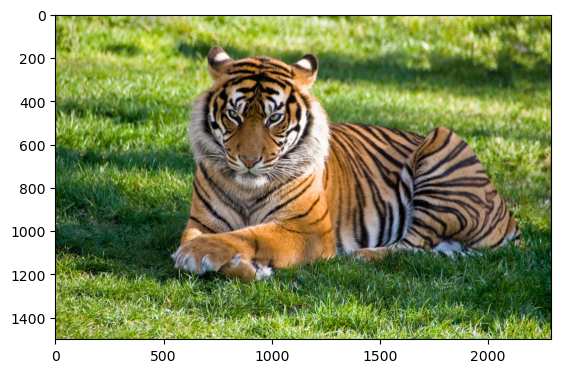

In [15]:
#Cargando y visualizando imagen a convertir
img = cv2.imread('tigre.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Definición de la función 

In [87]:
def gamacolores(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]
    nombre_color = ""
    imgSalida = np.zeros((alto, ancho, 3))  # Lienzo, arreglo para RGB
    for i in range(alto):
        for j in range(ancho):
            pixel = img[i, j]
            # Extracción de canales
            red = pixel[0]  # Red es el tercer canal en OpenCV
            green = pixel[1]  # Green es el segundo canal en OpenCV
            blue = pixel[2]  # Blue es el primer canal en OpenCV
            if color == 1:
                imgSalida[i, j] = [0, 0, blue]
                nombre_color = "Blue"
            elif color == 2:
                imgSalida[i, j] = [0, green, 0]
                nombre_color = "Green"
            elif color == 3:
                imgSalida[i, j] = [red, 0, 0]
                nombre_color = "Red"
            elif color == 10:
                imgSalida[i, j] = [red, green, 0]
                nombre_color = "Red_Verde"
            elif color == 20:
                imgSalida[i, j] = [0, green, blue]
                nombre_color = "Green_Blue"
            elif color == 30:
                imgSalida[i, j] = [red, 0, blue]
                nombre_color = "Blue_Red"
    return imgSalida, nombre_color

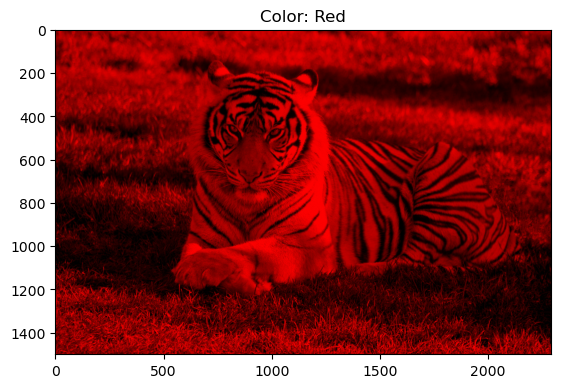

In [93]:
# Aplicar la función
img_procesada, nombre_color = gamacolores(img, 3)

# Mostrar la imagen procesada
plt.imshow(img_procesada.astype(np.uint8))
plt.title(f'Color: {nombre_color}')
plt.show()

### Problema 2
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1, imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color.


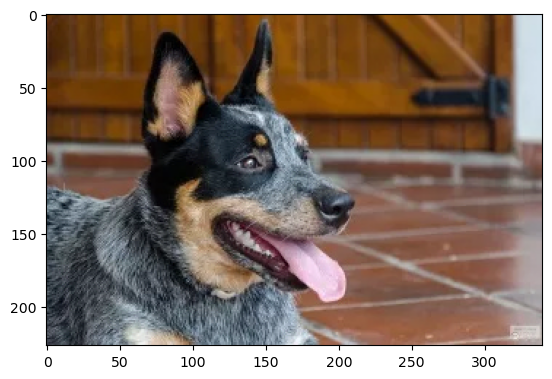

In [107]:
def UnionColores(Red, Green, Blue):

    # Conversión de las imágenes de entrada a codificación RGB
    Red = cv2.cvtColor(Red, cv2.COLOR_BGR2RGB) # Color Rojo (Red)
    Green = cv2.cvtColor(Green, cv2.COLOR_BGR2RGB) # Color Verde (Green)
    Blue = cv2.cvtColor(Blue, cv2.COLOR_BGR2RGB) # Color Azul (Blue)

    # Se extraen los canales "útiles" de cada imagen base
    Red = Red[:,:,0]
    Green = Green[:,:,1]
    Blue = Blue[:,:,2]

    # Copia de los datos del primer canal de color
    img_Salida = Red.copy()

    # Se agregan los dos canales adicionales de color a la matriz tridimensional
    return np.dstack((img_Salida, Green, Blue))

# Se carga cada canal de color
img_Red = cv2.imread("perro_salida_gray_rojo.jpg")
img_Green = cv2.imread("perro_salida_gray_verde.jpg")
img_Blue = cv2.imread("perro_salida_gray_azul.jpg")

# Se prueba la función creada desplegando los resultados
img_unida = UnionColores(img_Red, img_Green, img_Blue)
plt.imshow(img_unida)

### Problema 3
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

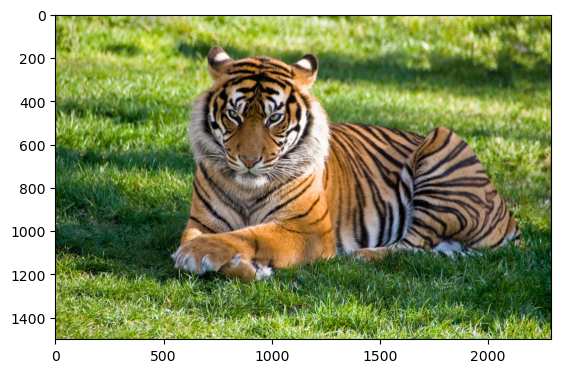

In [109]:
plt.imshow(img)
alto = img.shape[0]
ancho = img.shape[1]  
gray_green = np.zeros((alto,ancho,1))
gray_blue = np.zeros((alto,ancho,1))
gray_red = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
gray_ponderado = np.zeros((alto,ancho,1))

In [110]:
for i in range(0,alto):
    for j in range(0,ancho):
        pixel = img[i,j]
        gray_red[i,j] = pixel[0]
        gray_green[i,j] = pixel[1]
        gray_blue[i,j] = pixel[2]
        
        gray_aritmetica[i,j] = np.mean(pixel)
        gray_ponderado[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])

In [111]:
def imagenc(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    imgc = cv2.imread(strImg)
    imgc = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB)
    plt.imshow(imgc)

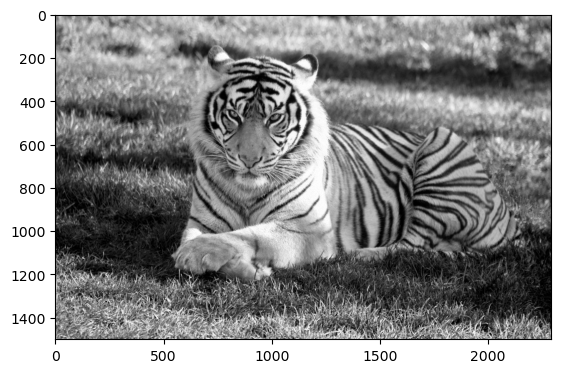

In [112]:
imagenc("gray_rojo.jpg",gray_red)

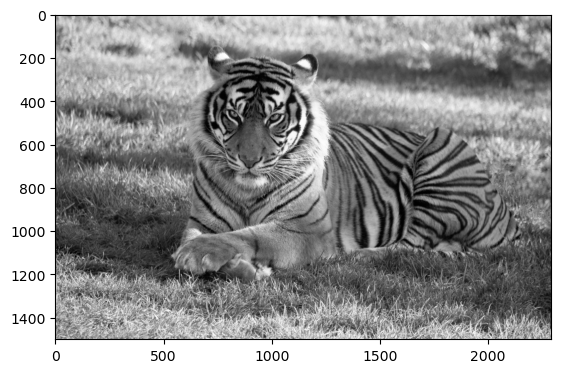

In [113]:
imagenc("gray_verde.jpg",gray_green)

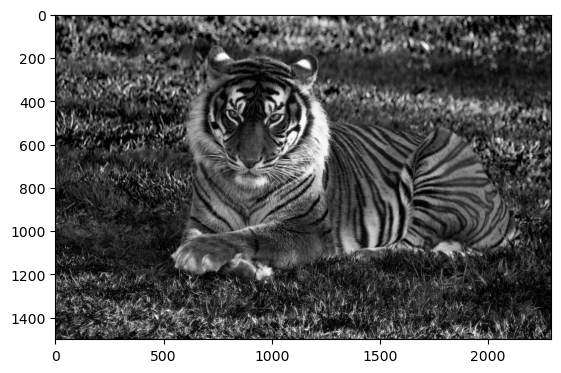

In [114]:
imagenc("gray_azul.jpg",gray_blue)

### Problema 4
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribucion.

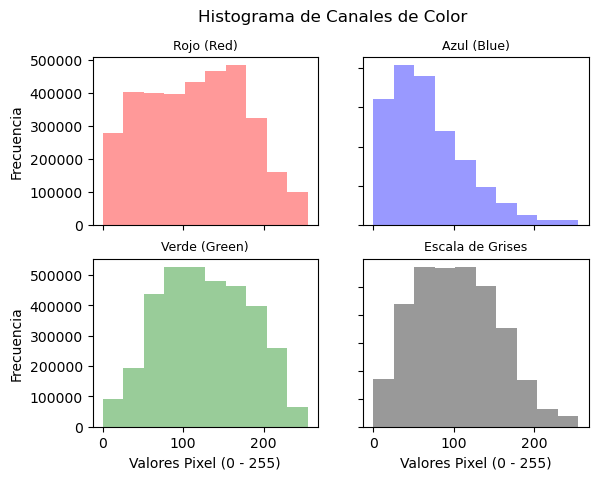

In [117]:
def Histograma(img_grafica):

    # Se carga la imagen con el nombre almacenado en "img_str"
    img = cv2.imread(img_grafica)

    # Se convierte la imagen a codificación RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Se obtiene el promedio aritmético para la escala de grises
    gray = np.mean(img, axis = 2)

    # Se generan los histogramas para cada color
    fig, axs = plt.subplots(2, 2)
    axs[0,0].hist(img[:,:,0].flatten('F'), color = "Red", alpha = 0.4)
    axs[0,0].set_title("Rojo (Red)", fontsize = 9)
    axs[1,0].hist(img[:,:,1].flatten('F'), color = "Green", alpha = 0.4)
    axs[1,0].set_title("Verde (Green)", fontsize = 9)
    axs[0,1].hist(img[:,:,2].flatten('F'), color = "Blue", alpha = 0.4)
    axs[0,1].set_title("Azul (Blue)", fontsize = 9)
    axs[1,1].hist(gray.flatten('F'), color = "Black", alpha = 0.4)
    axs[1,1].set_title("Escala de Grises", fontsize = 9)

    # Título de todo el gráfico
    fig.suptitle("Histograma de Canales de Color")

    # Se le coloca labels a cada gráfica
    for ax in axs.flat:
        ax.set(xlabel='Valores Pixel (0 - 255)', ylabel='Frecuencia')

    # Se eliminan las labels para los plots a la derecha
    for ax in axs.flat:
        ax.label_outer()
    
    plt.show()

# Se prueba la función creada
Histograma("tigre.jpeg")

### Problema 5 
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solucion unica).

El enfoque de escala de grises ponderado consiste en convertir una imagen en color a una imagen en escala de grises utilizando una combinación ponderada de los canales de color (Rojo, Verde, Azul). Esto se hace porque los diferentes colores tienen diferentes niveles de percepción por parte del ojo humano. En general, el ojo humano es más sensible al verde, seguido del rojo y finalmente del azul.

Una de las fórmulas más comunes para la conversión ponderada a escala de grises es:

Grayscale = 0.2989×𝑅+0.5870×𝐺+0.1140×𝐵
Grayscale=0.2989×R+0.5870×G+0.1140×B

Estos coeficientes se basan en la luminancia relativa de cada color y están diseñados para reflejar cómo percibimos el brillo de los diferentes colores.

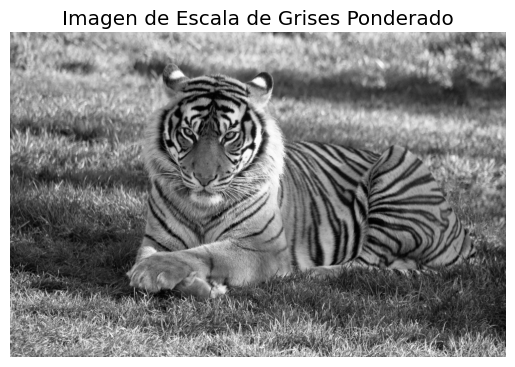

In [122]:
def escala_grises_ponderada(img):
    # Coeficientes ponderados para los canales de color
    coeficientes = np.array([0.2989, 0.5870, 0.1140])
    
    # Aplicar los coeficientes a los canales de color
    img_gris = np.dot(img[..., :3], coeficientes)
    
    return img_gris

# Cargar la imagen
img_color = cv2.imread('tigre.jpeg')

# Convertir la imagen de BGR a RGB
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises ponderada
img_gris_ponderada = escala_grises_ponderada(img_color_rgb)

# Mostrar la imagen en escala de grises
plt.imshow(img_gris_ponderada, cmap='gray')
plt.title('Imagen de Escala de Grises Ponderado')
plt.axis('off')
plt.show()

## Problema   6:

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajo los demás ejercicios.

Es un modelo de representación de colores que describe los colores en términos de sus componentes: tono (Hue), saturación (Saturation) y valor (Value). A diferencia del espacio de color RGB, que se basa en la mezcla de los colores primarios rojo, verde y azul, el espacio HSV está más alineado con la forma en que los humanos perciben y describen los colores.

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que representa los colores de manera más intuitiva para los humanos en comparación con el espacio de color RGB. A continuación se describe cada componente del espacio de color HSV:

Hue (Tono): Representa el color en sí mismo y se mide en grados en un círculo de 0 a 360. Cada valor de Hue corresponde a un color específico. Por ejemplo:

0° = Rojo
60° = Amarillo
120° = Verde
180° = Cian
240° = Azul
300° = Magenta
Saturation (Saturación): Representa la pureza o intensidad del color y se mide como un porcentaje de 0 a 100. Un valor de saturación de 0% corresponde a un color gris (sin color), mientras que un valor de 100% corresponde a un color completamente puro.

Value (Valor): Representa el brillo del color y también se mide como un porcentaje de 0 a 100. Un valor de 0% es completamente negro (sin brillo), mientras que un valor de 100% es el color más brillante de ese tono.

Mapeo de Colores al Espacio HSV
Para mapear un color del espacio RGB al espacio HSV, se realizan los siguientes pasos:

Normalización: Los valores RGB se normalizan dividiendo cada componente por 255 para obtener valores entre 0 y 1.
Cálculo del Valor (V): Se toma el valor máximo de los componentes RGB normalizados.
Cálculo de la Saturación (S): Se calcula la diferencia entre el valor máximo y mínimo de los componentes RGB normalizados, y se divide por el valor máximo. Si el valor máximo es 0, la saturación se establece en 0.
Cálculo del Tono (H): Dependiendo del componente RGB máximo.

### Mapeo

Para transformar o mapear los colores del espacio RGB a HSV se deben seguir los siguientes pasos

1. Se dividen todos los canales (R, G, B) entre 255

<br>

2. Se calcula el valor máximo, mínimo y la diferencia entre estos valores para cada pixel

    - cmax = max(R,G,B)
    - cmin = min(R,G,B)
    - diff = cmax - cmin

<br>

3. Cálculo para Hue (h):

    - Si cmax = cmin = 0, entonces h = 0
    - Si cmax = R, entonces h = (60*((G - B) / diff) + 360) % 360
    - Si cmax = G, entonces h = (60*((B - R) / diff) + 120) % 360
    - Si cmax = B, entonces h = (60*((R - G) / diff) + 240) % 360

<br>

4. Cálculo para Saturación (s):

    - Si cmax = 0, entonces s = 0
    - Si cmax != 0, entonces s = (diff / cmax) * 100

<br>

5. Cálculo para Valor (v):

    - v = cmax * 100
